In [1]:
import  numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as prepro

In [50]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.6)
X_train, X_test = X_train.astype(np.float32), X_test.astype(np.float32)

In [51]:
class MyNN(keras.Model):
    def __init__(self, hidden_size=5, output_size=3, name = "mynn"):
        super().__init__(name = name)
        self.l1 = layers.Dense(hidden_size)
        self.l2 = layers.Dense(output_size)
        
    def call(self, x):
        y = self.l1(x)
        y = keras.activations.sigmoid(y)
        y = self.l2(y)
        return y
    

In [52]:
model = MyNN(5, 3)


In [55]:

model.compile(
    optimizer = keras.optimizers.Adam(learning_rate = 0.01),
    loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = "acc",
    run_eagerly = False
)

history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 0s 21ms/step - loss: 0.1456 - acc: 1.0000 - val_loss: 0.2109 - val_acc: 0.9167
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1366 - acc: 1.0000 - val_loss: 0.2108 - val_acc: 0.9167
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1344 - acc: 1.0000 - val_loss: 0.2105 - val_acc: 0.9167
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1295 - acc: 1.0000 - val_loss: 0.2061 - val_acc: 0.9167
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1292 - acc: 1.0000 - val_loss: 0.2029 - val_acc: 0.9167
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1238 - acc: 1.0000 - val_loss: 0.2019 - val_acc: 0.9167
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1216 - acc: 1.0000 - val_loss: 0.2029 - val_acc: 0.9167
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1198 - acc: 1.0000 - va

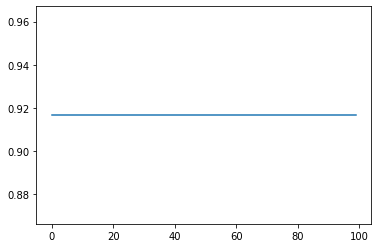

In [58]:
df =  pd.DataFrame(history.history)
plt.plot(df["val_acc"])

In [59]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 1ms/step - loss: 0.0673 - acc: 0.9778


[0.06728243827819824, 0.9777777791023254]

In [67]:
from sklearn.datasets import load_wine
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size = 0.6)
X_train = prepro.scale(X_train)
X_test = prepro.scale(X_test)

In [61]:
model = MyNN(100, 3)

In [78]:
model.compile(
    optimizer=keras.optimizers.Adamax(learning_rate = 0.02),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics="acc",
    run_eagerly=False
)
model.fit(X_train, y_train, batch_size=32, epochs=100, validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 0s 49ms/step - loss: 1.3267 - acc: 0.3393 - val_loss: 1.1923 - val_acc: 0.3333
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 1.0832 - acc: 0.4286 - val_loss: 1.0928 - val_acc: 0.4000
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 1.1657 - acc: 0.3929 - val_loss: 1.1977 - val_acc: 0.4000
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 1.2007 - acc: 0.3929 - val_loss: 1.0816 - val_acc: 0.4000
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0701 - acc: 0.3929 - val_loss: 1.0024 - val_acc: 0.4000
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 0.9975 - acc: 0.3929 - val_loss: 1.0117 - val_acc: 0.3333
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0125 - acc: 0.3571 - val_loss: 1.0162 - val_acc: 0.3333
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 1.0027 - acc: 0.3571 - va

In [79]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 763us/step - loss: 0.2907 - acc: 0.9439


[0.29068461060523987, 0.9439252614974976]

In [3]:
keras.Model.compile?

Signature:
keras.Model.compile(
    self,
    optimizer='rmsprop',
    loss=None,
    metrics=None,
    loss_weights=None,
    weighted_metrics=None,
    run_eagerly=None,
    **kwargs,
)
Docstring:
Configures the model for training.

Arguments:
    optimizer: String (name of optimizer) or optimizer instance. See
      `tf.keras.optimizers`.
    loss: String (name of objective function), objective function or
      `tf.keras.losses.Loss` instance. See `tf.keras.losses`. An objective
      function is any callable with the signature `loss = fn(y_true,
      y_pred)`, where y_true = ground truth values with shape =
      `[batch_size, d0, .. dN]`, except sparse loss functions such as sparse
      categorical crossentropy where shape = `[batch_size, d0, .. dN-1]`.
      y_pred = predicted values with shape = `[batch_size, d0, .. dN]`. It
      returns a weighted loss float tensor. If a custom `Loss` instance is
      used and reduction is set to NONE, return value has the shape
      [bat